Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [ ]:
COLLABORATORS = "Zala Bhan, Anjali Prasad, Eva Cullen"

## To receive credit for this assignment, you must also fill out the [AI Use survey](https://forms.gle/ZhR5k8TdAeN8rj4CA)


---

In [ ]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
import pandas as pd

# Final Project

This notebook will provide a brief structure and rubric for presenting your final project. 

The purpose of the project is 2-fold
* To give you an opportunity to work on a problem you are truly interested in (as this is the best way to actually learn something)
* To demonstrate to me that you understand the overall workflow of problem solving from problem selection to implementation to discussion 

You can choose any subject area that interests you as long as there is a computational component to it.  However, please do not reuse projects or homeworks you have done in other classes.  This should be **your** original work.

**You can work in teams, but clearly identify each persons contribution** and every team member should hand in their own copy of the notebook.

### Structure
There are 5 parts for a total of 100 points that provide the overall structure of a mini research project.

* Abstract
* Introduction and Problem Description
* Brief discussion of Computational approach and import of any additional packages
* Implementation including tests
* Discussion of results and future directions

For grading purposes, please try to make this notebook entirely self contained. 

The project is worth about 2 problem sets and should be of comparable length (please: I will have about 100 of these to read and I am not expecting full 10 page papers).  The actual project does not necessarily have to work but in that case you should demonstrate that you understand why it did not work and what steps you would take next to fix it.

Have fun

## Abstract [10 pts]

Provide a 1-2 paragraph abstract of the project in the style of a research paper.  The abstract should contain

* A brief description of the problem
* A brief justification describing why this problem is important/interesting to you
* A general description of the computational approach
* A brief summary of what you did and what you learned


Cardiovascular diseases remain a leading cause of morbidity and mortality worldwide, and understanding blook flow behavior in compliant, viscoelastic vessels is critical for diagnosis, treatment planning, and medical device design. Consequently, developing efficient and accurate computational methods can provide clinicians and researchers with valuable insights into disease progression, surgical outcomes, and personalized medicine. The frequency-domain spectral element method (SEM) offers a computational advantage over the traditional finite element method (FEM) while maintaining high accuracy for the purposes of application.

## Introduction [15 pts]

In ~4-5 paragraphs, describe 
* The general problem you want to solve
* Why it is important and what you hope to achieve.

Please provide basic **references**, particularly if you are reproducing results from a paper. Also include any basic equations you plan to solve. 

Please use proper spelling and grammar. 

### References

<sup>1</sup><span id="Lee and Jang SEM"> https://www.sciencedirect.com/science/article/abs/pii/S0096300312000264?via%3Dihub</span>

<sup>2</sup><span id="Bessems et al."> https://www.sciencedirect.com/science/article/abs/pii/S0021929007003922?via%3Dihub</span>

## Computational  Methods [10 pts]

Describe the specific approach you will take to solve some concrete aspect of the general problem. 

You should  include all the numerical or computational methods you intend to use.  These can include methods or packages  we did not discuss in class but provide some reference to the method. You do not need to explain in detail how the methods work, but you should describe their basic functionality and justify your choices. 




The following derivation for the frequency-domain SEM is taken from Lee and Jang (2012).<sup>1</sup> Implementing the SEM involves initial mathematical formulation and demonstration and validation cases. To simplify model formulation, we:
1. Drop vicoelasticity. i.e. we model the vessel wall as purely elastic, this would require us to re-derive the constitutive equation in the purely elastic limit (by setting relaxation times to zero).
2. Start by dropping nonlinear terms. i.e. we solve the linear governing equations, eliminating the need for an alternating frequency-time (AFT) method-based direct iteration method. We include the nonlinear terms if time allows?
3. Use a single, uniform element. i.e. we model the entire vessel as one spectral element and do not apply the "global system equation" utilized in the paper.
4. Do not verify the model using real, complex datasets.

We begin by defining the time-domain governing equations, comprising the continuity equation, the momentum balance equation, and the constitutive equation. The basis for this mathematical model is derived form from Bessem et al.<sup>2</sup> and assumes that blood is a Newtonian fluid that can be represented by three governing equations.<sup>1</sup> The continuity equation and momentum balance equation are given by 

$$
\frac{\delta A}{\delta t} + \frac{\delta Q}{\delta t} = -\psi \tag{continuity equation}
$$

and

$$
\frac{\delta Q}{\delta t} + \frac{\delta(\gamma Q^2 A^{-1})}{\delta x} + \rho^{-1} A \frac{\delta P}{\delta x}
= Af_x - \nu \eta Q A^{-1} + \nu \frac{\delta^2 Q}{\delta x^2} \tag{momentum balance equation}
$$

in which $Q(x,t)$ is the volumetric blood flow rate, $P(x,t)$ is the blood pressure, $A(x,t)$ is the lumen cross-sectional area of the vessel, $\psi$ is the outflow function which represents the outflow across the permeable vessel wall, $f_x$ is the body force acting on the blood fluid in the $x$-direction, $\rho$ is the mass density of blood fluid, and $\nu$ is the kinematic viscosity of blood fluid.<sup>1</sup> $\gamma$ and $\eta$ are parameters determined by the flow velocity profile across the cross-section of a vessel, and are given by 
$$
\begin{aligned}
\gamma &= 0 & \eta &= 0 && \text{(uniform flow)} \\
\gamma &= \frac{1}{3} & \eta &= 8\pi && \text{(parabolic flow)} \\
\gamma &= \frac{2}{3}R^{-1} \delta & \eta &= 2\pi R \delta^{-1} && \text{(boundary-layered flow)}
\end{aligned}
$$

The constitutive equation is given by
$$
Rh^{-1}(P-P_d) + \tau_{\epsilon} \frac{\delta(Rh^{-1}(P-P_d))}{\delta t}
= \frac{E}{2}(1-\mu^2)^{-1} \left[(A-A_d)A_d^{-1} + \tau_{\sigma}A_d^{-1} \frac{\delta A}{\delta t} \right]
$$
in which $h$ is the thickness of the vessel wall, $\mu$ is Poisson's ratio, and $E$ is Young's modulus of the vessel. $\tau_{\epsilon}$ and $\tau_{\sigma}$ represent the relaxation times for viscoelastic vessels at constant strain $\epsilon$ and constant stress $\sigma$, and the subscript $d$ represents quantities at the diastole phase.<sup>1</sup> In our simplified model, we will eventually set $\tau_\epsilon = \tau_\sigma = 0$.

The solutions to the time-domain governing equations are as follows:
$$
\begin{aligned}
Q(x,t) &= Q_d + q(x,t) \\
P(x,t) &= P_d + p(x,t) \\
A(x,t) &= A_d(x) + a(x,t)
\end{aligned}
$$
in which $Q_d$, $P_d$, and $A_d(x)$ are the constant blood flow rate, the constant blood pressure, and the lumen cross-section area at the diastole phase, respectively. Making the assumption that $a \ll A_0$ and noting that $p=q=a=0$ at the diastole phase, we obtain new forms of the governing equations in terms of $q$, $p$, and $a$:
$$
\dot{a} + q' = -\psi \tag{continuity equation}
$$
$$
\begin{aligned}
\dot{q} + 2\gamma Q_d A_0^{-1} q' + (2\gamma \theta Q_d A_0^{-1})q - \nu q'' + \rho^{-1} A_0 p' - \gamma Q_d^2 A_0^{-2} a' \\
= A_0 f_x - \gamma(2A_0^{-1} qq' + A_0^{-1} \theta q^2 - 2A_0^{-2}Q_d qa' - A_0^{-2} q^2 a')
\end{aligned} \tag{momentum balance equation}
$$
$$
p + \tau_{\epsilon} \dot{p} = \kappa(a + \tau_{\sigma} \dot{a}) \quad \text{with} \quad \kappa = \frac{1}{2}EHR^{-1} A_0^{-1} (1-\mu^2)^{-1} \tag{constitutive equation}
$$
In these equations, the dot ($\cdot$) and prime ($'$) represent the partial deriatives w.r.t to time $t$ and the spatial coordinate $x$, respectively. We obtain the final forms of the time-domain governing equations as
$$
\mathbf{M}\mathbf{\ddot{u}} + \mathbf{C}\mathbf{\dot{u}} + \mathbf{G}\mathbf{\dot{u}'} + \mathbf{D}\mathbf{u}'' + \mathbf{A}\mathbf{u}' + \mathbf{K}\mathbf{u} = \mathbf{f}_e + \mathbf{f}_{NL}
$$
with the state vector
$$
\mathbf{u}(x,t) = \mathbf{\begin{pmatrix} p(x,t) \\ q(x,t) \end{pmatrix}}
$$

so that $\mathbf{M,C,G,D,A,K}$ are $2 \times 2$ coefficient matricies determined by the linearized governing equations.

To construct the spectral element, we first transform the time-domain governing equations into the frequency-domain governing equations using discrete Fourier transform theory. We represent the time histories of $\mathbf{u}(x,t)$, $\mathbf{f}_e(x,t)$, and $\mathbf{f}_{NL}(x,t)$ in the spectral forms:
$$
\{ \mathbf{u}(x,t), \mathbf{f}_e(x,t), \mathbf{f}_{NL}(x,t) \} = \frac{1}{N} \sum_{n=0}^{N-1} {\mathbf{\bar{u}}(x;\omega_n), \mathbf{\bar{f}_e}(x;\omega_n), \mathbf{\bar{f}_{NL}}(x;\omega_n)} \, e^{i \omega_n t}
$$
where
$$
\mathbf{\bar{u}} = \begin{Bmatrix} \bar{p} \\ \bar{q} \end{Bmatrix}, 
\mathbf{\bar{f}_e} = \begin{Bmatrix} \bar{f}_{e1} \\ \bar{f}_{e2} \end{Bmatrix},
\mathbf{\bar{f}_{NL}} = \begin{Bmatrix} 0 \\ \bar{f}_{NL} \end{Bmatrix}
$$

**This is computational component #1.** We use `numpy.ftt.ftt`. We obtain the frequency-domain governing equations as
$$
\mathbf{D}\mathbf{\bar{u}}'' + \mathbf{H}\mathbf{\bar{u}}' + \mathbf{L}\mathbf{\bar{u}} = \mathbf{\bar{f}}_e + \mathbf{\bar{f}}_{NL}
$$
in which
$$
\mathbf{H} = i \omega_n \mathbf{G} + \mathbf{A}, \quad \mathbf{L} = o \omega_n \mathbf{C} + \mathbf{K} - \omega_n^2 \mathbf{M}
$$

We also define the spectral nodel degrees of greedom (DOFs) vectors as
$$
\mathbf{d}_p = \begin{Bmatrix} \bar{p}_1 \\ \bar{p}_2 \end{Bmatrix} = \begin{Bmatrix} +\bar{p}(0) \\ +\bar{p}(l) \end{Bmatrix}
$$
$$
\mathbf{d}_q = \begin{Bmatrix} \bar{q}_1 \\ \bar{q}_2 \end{Bmatrix} = \begin{Bmatrix} +\bar{q}(0) \\ -\bar{q}(l) \end{Bmatrix}
$$
with the graphic taken from Lee and Jang<sup>1</sup> showing the sign convention.

From the linear governing equation, we obtain a dispersion relation and solve for wavenumbers that represent the forward and backward traveling waves. We consider the linear homogeneous governing equations by setting $\mathbf{\bar{f}}_e = \mathbf{\bar{f}}_{NL} = 0$:
$$
\mathbf{D}\mathbf{\bar{u}}'' + \mathbf{H}\mathbf{\bar{u}}' + \mathbf{L}\mathbf{\bar{u}} = 0
$$

Assume a general solution fo the form $\mathbf{\bar{u}}(x) = \mathbf{a} e^{-ikx}$ and substitute into the linear homogeneous governing equations to obtain a dispersion relation as
$$
\beta_1 k^2 + \beta_2 k + \beta_3 = 0
$$
(specify $\beta$ here)
Then we calculate two wavenumbers from this dispersion relation as
$$
k_{1,2} = \frac{-\beta_2 \pm \sqrt{\beta_2^2 - 4 \beta_1 \beta_3}}{2\beta_1}
$$

Using the corresponding eigenvectors, we obtain a general solution to the linear homogeneous governing equations:
$$
\mathbf{\bar{u}}(x) = \begin{Bmatrix} \bar{p}(x) \\ \bar{q}(x) \end{Bmatrix}
= \mathbf{a}_1 e^{-ik_1 x} + \mathbf{a}_2 e^{-ik_2 x}
= \begin{bmatrix} e^{-ik_1 x} & e^{-ik_2 x} \\ \phi_1 e^{-ik_1 x} & \phi_2 e^{-ik_2 x} \end{bmatrix} \mathbf{c}
$$
with $c = \begin{Bmatrix} c_1 \\ c_2 \end{Bmatrix}$ being a constant vector. We then apply the spectral nodel DOFs to this solution:
$$
\mathbf{\bar{u}}(x) = \mathbf{N})_p(x;\omega_n) \mathbf{d}_p
$$

with $\mathbf{N}_p(x;\omega_n) = \begin{bmatrix} \mathbf{N}_1(x;\omega_n) \\ \mathbf{N}_2(x;\omega_n) \end{bmatrix}$ being the frequency-dependent dynamic shape function matrix. **This is computational element #2 (including the specific derivation?).**

Applying boundary conditions, we arrive at the spectral element equation:
$$
\mathbf{S}(\omega_n) \mathbf{d}_p = \mathbf{d}_q + \mathbf{\hat{f}}_e + \mathbf{\hat{f}}_{NL}(p,q)
$$
with
$$
\mathbf{S}(\omega_n) = \mathbf{Y}^{-1}(\omega_n) \mathbf{X}(\omega_n) \tag{exact dynamic stiffness equation}
$$
$$
\mathbf{X}(\omega_n) = -\int_{0}^{1} \mathbf{N}_p'^T \mathbf{D} \mathbf{N}_p' dx - \int_{0}^{1} \mathbf{N}_p'^T \mathbf{H} \mathbf{N}_p dx + \int_{0}^{1} \mathbf{N}_p^T \mathbf{L} \mathbf{N}_p dx
$$
$$
\mathbf{Y}(\omega_n) = [ \mathbf{N}_p^T (\mathbf{D} \mathbf{N}_p' + \mathbf{H} \mathbf{N}_p)|_0^l \mathbf{T}^{-1} ]
$$

and
$$
\mathbf{\hat{f}}_e = \mathbf{Y}^{-1} \int_{0}^{1} \mathbf{N}_p^T \mathbf{\bar{f}}_e dx
$$
$$
\mathbf{\hat{f}}_{NL}(p,q) = \mathbf{Y}^{-1} \int_{0}^{1} \mathbf{N}_p^T \mathbf{\bar{f}}_{NL}(p,q) dx
$$

**This is computational element #3 (creating the exact dynamic stiffness matrix).**

For a single, uniform spectral element with no nonlinearities, we transform the inlet flow signal from the time-domain to the frequency-domain using FFT, compute the exact dynamic stiffness matrix for a given frequency, solve for unknown boundary conditions in the frequency-domain, and transform to the time-domain using IFFT. **This is computational element #4, with the possible added task of including nonlinearities and using an AFT method instead.**

Finally, to validate our model, we show two simple test cases. In the first, we compare our single element SEM model to a finely discretized FEM model. In the second, we 

**If you need to install or import any additional python packages,  please provide complete installation instructions in the code block below**


In [2]:
# Provide complete installation or import information for external packages or modules here e.g.

#pip install somepackage
# from somepackage import blah
import numpy as numpy

## Implementation [50 pts]

Use the Markdown and Code blocks below to implement and document your methods including figures.  Only the first markdown block will be a grading cell but please add (not copy) cells in this section to organize your work. 

Please make the description of your problem readable by interlacing clear explanatory text with code (again with proper grammar and spelling). 
All code should be well described and commented.

For at least one routine you code below, you should provide a test block (e.g. using `numpy.testing` routines, or a convergence plot) to validate your code.  

An **important** component of any computational paper is to demonstrate to yourself and others that your code is producing correct results.

**Computational component \#1**

At the inlet boundary x = 0, I define simple test signals $p(0,t), q(0,t), f_{e1}(0,t), f_{e2}(0,t)$, and $f_{NL}(0,t)$. 
These are single-frequency sine and cosine functions so that the FFT and IFFT can be verified easily. 
I apply FFT in time to each signal, then apply IFFT, and compute the maximum reconstruction error.


In [95]:
def make_sem_params(L, rho, A0, Qd, gamma, theta, nu, kappa):
    params = {
        'L': L, # vessel length 
        'rho': rho, #blood density
        'A0': A0, # diastolic area
        'Qd': Qd, #diastolic flow 
        'gamma': gamma, #velocity profile param
        'theta': theta, #nonlinear velocity component
        'nu': nu, # kinematic viscosity 
        'kappa': kappa #area-pressure proportion
    }
    params['c1'] = A0 / rho
    params['u'] = 2. * gamma * Qd / A0
    params['alpha'] = 2. * gamma * theta * Qd / A0 
    params['c2'] = params['c1'] - gamma*Qd**2 / (kappa * A0**2)
    params['Qp'] = 26e-6
    params['Pd'] = 84.2
    params['Ps'] = 130.0
    return params 

#for linear PDE in (p,q), we don't need to compute the forcing term fnl, and MCGDAK/DHL(w) are all independent of p,q
#thus per frequency we can just build S(w), solve S(w)d_p and get d_q, then IFFT back to time 
#below is the linear SEM method before building the AFT to test the nonlinear SEM 

#SEM physical parameters based on Lee & Jang (elastic, linear)

#geometry
R = 0.0086 # m lumen radius = 0.86 cm
h = 0.000602 # m wall thickness = 0.0602 cm
A0 = numpy.pi * R**2 #m^2 diastolic cross-sectional area

#vessel length (we model a 4 cm segment)
L = 0.04 # m

#fluid properties
rho = 1055.0 #kg/m^3 blood density (1.055 g/cm^3)
nu  = 4.6e-6 #m^2/s kinematic viscosity (0.046 cm^2/s)

#velocity profile parameters
gamma = 1. / 3. # parabolic profile
theta = 0.
#mean inlet flow rate
Qd = 14e-6 #m^3/s (14 cm^3/s)

#wall material properties
E  = 1.4812e6 #Pa, Young's modulus
mu = 0.25 #poisson's ratio

#linearized area–pressure coefficient we derived for simplified model 
kappa = 0.5 * E * h / (R * A0 * (1.0 - mu**2))

#build parameter dictionary
params = make_sem_params(
    L=L,
    rho=rho,
    A0=A0,
    Qd=Qd,
    gamma=gamma,
    theta = theta,
    nu=nu,
    kappa=kappa
)

print(params)



{'L': 0.04, 'rho': 1055.0, 'A0': 0.0002323521926595011, 'Qd': 1.4e-05, 'gamma': 0.3333333333333333, 'theta': 0.0, 'nu': 4.6e-06, 'kappa': 237992732.93008944, 'c1': 2.2023904517488257e-07, 'u': 0.040168905774049656, 'alpha': 0.0, 'c2': 2.2023396033162534e-07, 'Qp': 2.6e-05, 'Pd': 84.2, 'Ps': 130.0}


In [96]:
def make_sem_matrices(params):
    A0 = params['A0']
    rho = params['rho']
    Qd =params['Qd'] 
    gamma = params['gamma']
    theta = params['theta'] # set this differently for nonlinear
    nu = params['nu']
    kappa = params['kappa']
    
    #derived coeffs 
    
    # c1 = A0/rho, comes from the inertia term (A * p_x / rho)
    c1 = A0 / rho
    #c2 = c1 minus the convective correction term from linearizing gamma * Q^2 / A
    c2 = c1 - gamma * Qd**2 / (kappa * A0**2) 

    u = 2. * gamma * Qd / A0
    alpha = 2. * gamma * theta * Qd / A0 #nonzero fro nonlinear case
    #matrices
    M = numpy.zeros((2,2), dtype=complex)
    G = numpy.zeros((2,2), dtype=complex)
    C = numpy.array([[1. / kappa, 0.],[0.,1.]], dtype=complex)
    D = numpy.array([[0., 0.],[0.,-nu]], dtype=complex)
    A = numpy.array([[0., 1.],[c2,u]], dtype=complex)
    K = numpy.array([[0., 0.],[0.,alpha]], dtype=complex) #nonzero for linear case
    return M, C, G, D, A, K

make_sem_matrices(params)


#M = 0 because there are no second time derivative terms for p or q
#C has the coefficients in front of p_t and q_t (1/kappa for p_t, 1 for q_t)
#G = 0 because there are no mixed time-space derivative terms
#D has only the viscosity term on q_xx (the only second spatial derivative)
#A has the first spatial derivative terms (qx in continuity, px and qx in momentum)
#K = 0 here because theta = 0 so alpha = 0 (would be nonzero otherwise)

#FOR THE NONLINEAR CASE, just make theta nonzero so there's velocity profile damping
#then add the nonlinear forcing term fnl 


(array([[0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j]]),
 array([[4.20180897e-09+0.j, 0.00000000e+00+0.j],
        [0.00000000e+00+0.j, 1.00000000e+00+0.j]]),
 array([[0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j]]),
 array([[ 0.0e+00+0.j,  0.0e+00+0.j],
        [ 0.0e+00+0.j, -4.6e-06+0.j]]),
 array([[0.00000000e+00+0.j, 1.00000000e+00+0.j],
        [2.20233960e-07+0.j, 4.01689058e-02+0.j]]),
 array([[0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j]]))

In [97]:
def make_freq_matrices(omega, M, C, G, D, A,K):
    H = 1j * omega * G + A
    L = 1j * omega * C + K - (omega**2) * M
    return D, H, L

def wavenumbers(omega, params):
    # solves quadratic for wavenumber k at freqeuncy w (dispersion relation) 
    nu = params['nu']
    kappa = params['kappa']
    u = params['u']
    alpha = params['alpha']
    c2 = params['c2']

    b1 = c2 * kappa + 1j * nu * omega
    b2 = u * omega
    b3 = 1j * alpha * omega - omega**2
    disc = b2**2 -4. * b1 * b3
    k1 = (-b2 + numpy.sqrt(disc)) / (2. * b1)
    k2 = (-b2 - numpy.sqrt(disc)) / (2. * b1)
    return k1, k2

#copy this cell over for the nonlinear case
#wavenumber/freq matrices dont change, the RHS is just fnl not 0
#so just add the forcing term

In [71]:

def sem_dynam_stiffness(omega, params):
    L = params['L']
    kappa = params['kappa']
    k1, k2 = wavenumbers(omega, params) 
    e1 = numpy.exp(-1j * k1 * L)
    e2 = numpy.exp(-1j * k2 * L)
    phi1 = omega / (k1 * kappa)
    phi2 = omega / (k2 * kappa)

    P = numpy.array([[1.,1.],[e1,e2]], dtype=complex) # pressure matrix 
    Q = numpy.array([[phi1,phi2],[phi1*e1,phi2*e2]], dtype=complex) #flow matrix
    T = numpy.diag([1.,-1.]) #just makes sure q(0) is pos, q(L) negative for DOFs
    S = T @ Q @ numpy.linalg.inv(P) # matrix multiply to get dynamic stiffness matrix
    return S 

#everything here can be copied for the nonlinear case, this gives you S(w)


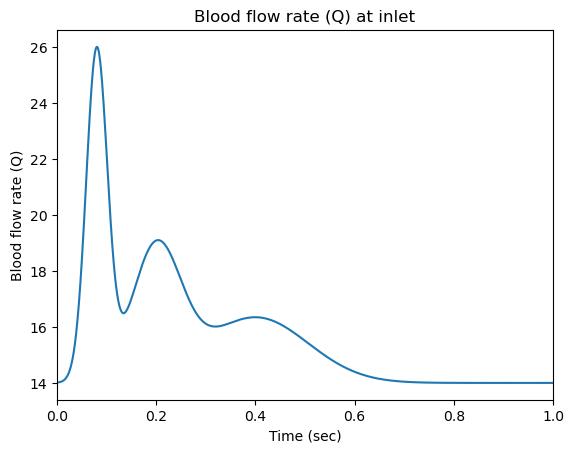

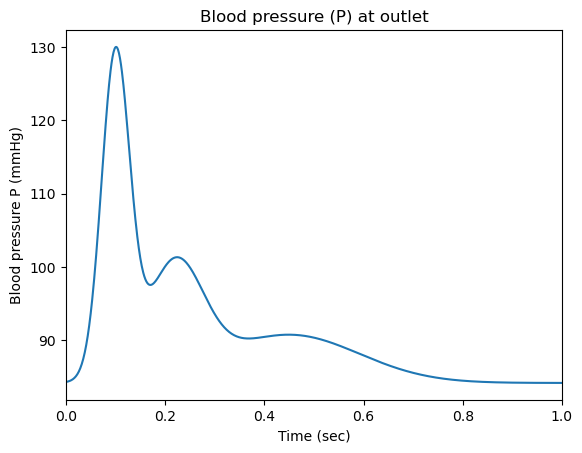

In [110]:
def sem_fft_ifft():

    #time grid stuff 
    T = 1.0
    N = 1000
    t = numpy.linspace(0.0, T, N, endpoint=False)
    dt = t[1] - t[0]
    
 
    #LEE AND JANG SIGNALS

    # construct a simple physiologic inflow waveform using three Gaussian components
    # the first term models the main systolic upstroke, the second adds a smaller 
    # late systolic shoulder, and the third produces a smooth diastolic decay
    # the combined shape is normalized and scaled between Qd (diastolic flow) and Qp (peak flow)
    def inlet_flow(t, params):
        Qd = params['Qd']
        Qp = params['Qp']
        tau = (t % 1.0)
    
        f1 = numpy.exp(-((tau-0.08)/0.03)**2)*1.0
        f2 = numpy.exp(-((tau-0.20)/0.07)**2)*0.4
        f3 = numpy.exp(-((tau-0.40)/0.15)**2)*0.2
    
        shape = f1 + f2 + f3
        shape = shape / numpy.max(shape)
    
        return Qd + (Qp - Qd)*shape

    
    # outlet pressure is modeled with the same three-component structure
    # a dominant systolic peak is followed by a smaller shoulder and a broad diastolic term
    # producws a smooth pressure pulse that transitions between Pd (diastolic) and Ps (systolic)
    def outlet_pressure(t, params):
        Pd = params['Pd']*133.322
        Ps = params['Ps']*133.322
        tau = (t % 1.0)
    
        p1 = numpy.exp(-((tau-0.10)/0.04)**2)*1.0
        p2 = 0.35*numpy.exp(-((tau-0.22)/0.08)**2)
        p3 = 0.15*numpy.exp(-((tau-0.45)/0.20)**2)
    
        shape = p1 + p2 + p3
        shape = shape / numpy.max(shape)
    
        return Pd + (Ps - Pd)*shape

    #time domain BCs
    qint=inlet_flow(t, params)
    poutt=outlet_pressure(t, params)
  #  fe1=numpy.sin(4*numpy.pi*t)
  #  fe2=numpy.zeros_like(t)
  #  fnl=numpy.zeros_like(t)
    
    #FFT for qin and pout
    qin_fft=numpy.fft.fft(qint)
    pout_fft=numpy.fft.fft(poutt)
  #  fe1_fft=numpy.fft.fft(fe1)
  #  fe2_fft=numpy.fft.fft(fe2)
  #  fnl_fft=numpy.fft.fft(fnl)
    freq=numpy.fft.fftfreq(N, dt)
    omega=2*numpy.pi*freq

    #spectral unknowns
    pin_fft = numpy.zeros(N, dtype=complex)
    qout_fft = numpy.zeros(N, dtype=complex)

    for n, w in enumerate(omega): 
        if abs(w) < 1e-12:
            pin_fft[n] = 0.
            qout_fft[n] = 0.
            continue

        S = sem_dynam_stiffness(w, params)
        #S(w) entries
        S11 = S[0,0]
        S12 = S[0,1]
        S21 = S[1,0]
        S22 = S[1,1]
        qin = qin_fft[n]
        pout = pout_fft[n]
        pin = (qin - S12 * pout) / S11
        pin_fft[n] = pin
        qout = -S21 * pin - S22 * pout
        qout_fft[n] = qout
        #S = numpy.eye(2, dtype=complex) # THIS IS A TEST VARIABLE. It subs the identity matrix in as S
        #MAX ERROR SHOULD BE 10e-16 or 0 ish for BOTH INLET AND OUTLET, make sure to run this before using S
        #it is 4e-16 and 0 respectively for the linear case. 
        #dp = numpy.array([pin_fft[n],pout_fft[n]], complex)
        #dq = S @ dp
        #qin_fft[n] = dq[0]
        #qout_fft[n] = -dq[1]

    #IFFT for same variables as above
    pintifft= numpy.fft.ifft(pin_fft).real
    qoutifft= numpy.fft.ifft(qout_fft).real
    #fe1_t= numpy.fft.ifft(fe1_fft).real
    #fe2_t= numpy.fft.ifft(fe2_fft).real
    #fnl_t= numpy.fft.ifft(fnl_fft).real
    
    #errors between fft and ifft
    #ep = numpy.max(numpy.abs(p - p_t))
    #eq = numpy.max(numpy.abs(q - q_t))
    #e1 = numpy.max(numpy.abs(fe1 - fe1_t))
    #e2 = numpy.max(numpy.abs(fe2 - fe2_t))
    #eNL = numpy.max(numpy.abs(fnl - fnl_t))
    
    #print(ep, eq, e1, e2, eNL)
    return t, qint, pintifft, qoutifft, poutt

t, qint, pintifft, qoutifft, poutt = sem_fft_ifft()

#unit conversions for plotting (to match the paper)
qin_cm3s  = qint * 1e6
pout_mmHg = poutt / 133.322

plt.plot(t, qin_cm3s)
plt.xlabel('Time (sec)')
plt.ylabel('Blood flow rate (Q)')
plt.title('Blood flow rate (Q) at inlet')
plt.xlim(0.,1.)
plt.show()

plt.plot(t, pout_mmHg)
plt.xlabel('Time (sec)')
plt.ylabel('Blood pressure P (mmHg)')
plt.title('Blood pressure (P) at outlet')
plt.xlim(0.,1.)
plt.show()



#UNCOMMENT BELOW FOR TESTING 
#err_in  = numpy.max(numpy.abs(pin - qin_t))
#err_out = numpy.max(numpy.abs(qout_t)) 

#print("max error inlet:", err_in)
#print("max error outlet:", err_out)
#sem_fft_ifft()


In [125]:
# Below is a test SEM case using S = I to validate the frequency domain implementation.

def sem_fft_ifft():

    # time grid
    T = 1.0
    N = 2048
    t = numpy.linspace(0.0, T, N, endpoint=False)
    dt = t[1] - t[0]

    # Inlet flow signal based on three Gaussian components.
    # These represent the primary systolic peak, a secondary shoulder,
    # and a broader diastolic contribution. The waveform is normalized
    # and scaled between Qd (diastolic flow) and Qp (peak flow).
    def inlet_flow(t, params):
        Qd = params["Qd"]
        Qp = params["Qp"]
        tau = (t % 1.0)

        f1 = numpy.exp(-((tau - 0.08) / 0.03) ** 2) * 1.0
        f2 = numpy.exp(-((tau - 0.20) / 0.07) ** 2) * 0.4
        f3 = numpy.exp(-((tau - 0.40) / 0.15) ** 2) * 0.2

        shape = f1 + f2 + f3
        shape = shape / numpy.max(shape)

        return Qd + (Qp - Qd) * shape

    # Outlet pressure signal using the same three component structure.
    # Pd and Ps are converted from mmHg to Pascals.
    def outlet_pressure(t, params):
        Pd = params["Pd"] * 133.322
        Ps = params["Ps"] * 133.322
        tau = (t % 1.0)

        p1 = numpy.exp(-((tau - 0.10) / 0.04) ** 2) * 1.0
        p2 = 0.35 * numpy.exp(-((tau - 0.22) / 0.08) ** 2)
        p3 = 0.15 * numpy.exp(-((tau - 0.45) / 0.20) ** 2)

        shape = p1 + p2 + p3
        shape = shape / numpy.max(shape)

        return Pd + (Ps - Pd) * shape

    # time domain boundary conditions
    qint = inlet_flow(t, params)
    poutt = outlet_pressure(t, params)

    # apply FFT to inlet flow and outlet pressure
    qin_fft = numpy.fft.fft(qint)
    pout_fft = numpy.fft.fft(poutt)

    freq = numpy.fft.fftfreq(N, dt)
    omega = 2 * numpy.pi * freq

    # allocate arrays for spectral unknowns
    pin_fft = numpy.zeros(N, dtype=complex)
    qout_fft = numpy.zeros(N, dtype=complex)

    # frequency domain solve
    for n, w in enumerate(omega):

        # direct handling of the zero frequency mode
        if abs(w) < 1e-12:
            pin_fft[n] = qin_fft[n]
            qout_fft[n] = -pout_fft[n]
            continue

        # identity dynamic stiffness matrix for testing
        S = numpy.eye(2, dtype=complex)

        S11 = S[0, 0]
        S12 = S[0, 1]
        S21 = S[1, 0]
        S22 = S[1, 1]

        qin = qin_fft[n]
        pout = pout_fft[n]

        # solve for pin and qout in spectral space
        pin = (qin - S12 * pout) / S11
        pin_fft[n] = pin

        qout = -S21 * pin - S22 * pout
        qout_fft[n] = qout

        # reference calculation for direct mapping check
        # dp = numpy.array([pin_fft[n], pout_fft[n]], complex)
        # dq = S @ dp
        # qin_fft[n] = dq[0]
        # qout_fft[n] = -dq[1]

    # inverse FFT to recover time domain fields
    pintifft = numpy.fft.ifft(pin_fft).real
    qoutifft = numpy.fft.ifft(qout_fft).real

    return t, qint, pintifft, qoutifft, poutt


# run the test SEM evaluation
t, qint, pintifft, qoutifft, poutt = sem_fft_ifft()

# absolute errors
err_in = numpy.max(numpy.abs(pintifft - qint))
err_out = numpy.max(numpy.abs(qoutifft + poutt))

# relative errors
rel_in = err_in / numpy.max(numpy.abs(qint))
rel_out = err_out / numpy.max(numpy.abs(poutt))

# tolerances
atol = 1e-10
rtol = 1e-8

# assertion tests
assert (err_in < atol) or (rel_in < rtol), (
    f"Inlet error too large: abs={err_in}, rel={rel_in}"
)

assert (err_out < atol) or (rel_out < rtol), (
    f"Outlet error too large: abs={err_out}, rel={rel_out}"
)

print("inlet abs/rel error:", err_in, rel_in)
print("outlet abs/rel error:", err_out, rel_out)


inlet abs/rel error: 1.3552527156068805e-20 5.212510444641848e-16
outlet abs/rel error: 1.0913936421275139e-11 6.297037029652408e-16


## Discussion [15 pts]

Evaluate the results of your project including 
* Why should I believe that your numerical results are correct (convergence, test cases etc)?
* Did the project work (in your opinion)?
* If yes:  what would be the next steps to try
* If no:  Explain why your approach did not work and what you might do to fix it.


YOUR ANSWER HERE